In [137]:
# Librerías
import json
import pandas as pd
from pandas import json_normalize
import numpy as np
import umap
import re
import plotly.graph_objects as go
from umap import UMAP
from difflib import SequenceMatcher
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy.spatial.distance import cdist

# Carga del JSON
with open("songs_export.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 🎼 miNoise — Proceso CRISP-DM

## 1. Business Understanding (Comprensión del problema)


El problema de negocio subyacente es la traducción de la complejidad sonora en patrones visuales y jerárquicos interpretables.

En lugar de predecir emociones, miNoise busca comprender la organización interna de la música: cómo los rasgos acústicos configuran la identidad de los géneros y la posición relativa de los artistas dentro de ellos.

El resultado esperado no es un modelo predictivo, sino un sistema exploratorio de análisis musical, útil para visualización, análisis cultural o desarrollo de experiencias interactivas en entornos digitales.

### Objetivo
Explorar y representar la estructura acústica de la música a partir de sus características sonoras fundamentales, con el propósito de descubrir patrones jerárquicos entre géneros, artistas y canciones.

El proyecto miNoise busca determinar si los rasgos cuantificables del sonido (energía, timbre, tonalidad, complejidad armónica) pueden reflejar identidades estilísticas y afinidades culturales, generando una visualización tridimensional interpretativa del paisaje musical.

### Preguntas guía

1. ¿Cómo se estructuran los géneros musicales en función de sus características acústicas (timbre, energía, brillo, complejidad armónica)?

2. ¿Es posible representar a cada artista mediante un centroide acústico dentro de su género?

4. ¿Pueden técnicas de reducción de dimensionalidad (PCA, UMAP) generar un mapa jerárquico que capture la continuidad entre géneros y artistas?

5. ¿Cómo se puede visualizar esta jerarquía en un entorno interactivo (Género → Artista → Track)?

### Indicadores esperados

| Tipo             | Indicador                             | Descripción / Resultado esperado                                              |
| ---------------- | ------------------------------------- | ----------------------------------------------------------------------------- |
| **Analítico**    | Varianza explicada del PCA            | ≥ 80 %, confirmando estructura estable de los datos acústicos                 |
| **Estructural**  | Centroides por género y artista       | Representaciones promedio coherentes con su categoría                         |
| **Visual**       | Mapas 2D/3D (PCA, UMAP)               | Agrupamientos visibles y transiciones suaves entre estilos                    |
| **Jerárquico**   | Arquitectura Género → Artista → Track | Estructura escalonada lista para visualización interactiva                    |
| **Exploratorio** | Identificación de outliers            | Canciones o artistas alejados de su centroide de género (singularidad sonora) |


## 2. Data Understanding (Comprensión de los datos)

Aquí analizaremos el dataset `songs_export.json`:

1) Inspección estructural: cantidad de registros, columnas, tipos de datos.

2) Valores faltantes: identificar nulos o inconsistencias.

3) Distribución: histogramas y estadísticas descriptivas.

4) Relaciones: primeras correlaciones entre variables clave.


### 2.1 Explorando estructura anidada

In [6]:
# Explorar el tipo de dato. Si es `dict`, los datos serán objetos con claves que deberán abrirse
type(data)

dict

In [7]:
data.keys()

dict_keys(['artists', 'tracks'])

In [10]:
print(type(data["tracks"]))

<class 'list'>


In [11]:
print(len(data["tracks"]))

450


In [12]:
print(data["tracks"][0])

{'album': 'Turn It Around - Tribute to Sub Focus and Kele', 'artist_id': '0GzaI3hZcuFafv2RGvfnPA', 'artist_name': 'Turn It Around', 'features': {'bandwidth': 2762.426304014743, 'centroid': 2587.6206965907736, 'chroma': [0.4643256366252899, 0.46716809272766113, 0.3810468912124634, 0.4603399634361267, 0.3626116216182709, 0.367151141166687, 0.4638610780239105, 0.3031523823738098, 0.31166601181030273, 0.3433881402015686, 0.47088930010795593, 0.6100198030471802], 'mfcc': [-73.2640609741211, 80.78363800048828, 14.074420928955078, 17.975318908691406, 7.638917446136475, 11.56080150604248, 7.465428829193115, 8.956473350524902, 3.9386966228485107, 11.023097038269043, 2.8078999519348145, 9.193021774291992, 4.820379257202148], 'rms': 0.25456133484840393, 'rolloff': 5768.707688622448, 'zcr': 0.07876575414792755}, 'source': 'spotify', 'track_id': '49S1dSV2audIsxvOJ76Q2C', 'track_name': 'Turn It Around - Tribute to Sub Focus and Kele', 'year': '2013'}


In [13]:
print(len(data["artists"]))

295


In [9]:
print(data["artists"][0])

{'followers': 289, 'genres_spotify': [], 'id': '0GzaI3hZcuFafv2RGvfnPA', 'listeners_lastfm': None, 'name': 'Turn It Around', 'popularity': 0, 'popularity_hybrid': 0, 'related_artists_lastfm': [], 'related_artists_yt': ['Mauro Picotto', 'Energy 52', 'Alex M.O.R.P.H.', 'Andain', 'Key4050', 'York', 'Rank 1', 'Binary Finary', 'Ayla', 'Lange'], 'tags_lastfm': []}


In [6]:
print(json.dumps(artists[0], indent=2))

{
  "followers": 289,
  "genres_spotify": [],
  "id": "0GzaI3hZcuFafv2RGvfnPA",
  "listeners_lastfm": null,
  "name": "Turn It Around",
  "popularity": 0,
  "popularity_hybrid": 0,
  "related_artists_lastfm": [],
  "related_artists_yt": [
    "Mauro Picotto",
    "Energy 52",
    "Alex M.O.R.P.H.",
    "Andain",
    "Key4050",
    "York",
    "Rank 1",
    "Binary Finary",
    "Ayla",
    "Lange"
  ],
  "tags_lastfm": []
}


In [7]:
print(json.dumps(tracks[0], indent=2))

{
  "album": "Turn It Around - Tribute to Sub Focus and Kele",
  "artist_id": "0GzaI3hZcuFafv2RGvfnPA",
  "artist_name": "Turn It Around",
  "features": {
    "bandwidth": 2762.426304014743,
    "centroid": 2587.6206965907736,
    "chroma": [
      0.4643256366252899,
      0.46716809272766113,
      0.3810468912124634,
      0.4603399634361267,
      0.3626116216182709,
      0.367151141166687,
      0.4638610780239105,
      0.3031523823738098,
      0.31166601181030273,
      0.3433881402015686,
      0.47088930010795593,
      0.6100198030471802
    ],
    "mfcc": [
      -73.2640609741211,
      80.78363800048828,
      14.074420928955078,
      17.975318908691406,
      7.638917446136475,
      11.56080150604248,
      7.465428829193115,
      8.956473350524902,
      3.9386966228485107,
      11.023097038269043,
      2.8078999519348145,
      9.193021774291992,
      4.820379257202148
    ],
    "rms": 0.25456133484840393,
    "rolloff": 5768.707688622448,
    "zcr": 0.07876575

In [17]:
df_tracks_raw = pd.DataFrame(data["tracks"])
df_artists_raw = pd.DataFrame(data["artists"])

print(df_tracks_raw.shape)
print(df_artists_raw.shape)

df_tracks_raw.head(2)

(450, 8)
(295, 10)


,album,artist_id,artist_name,features,source,track_id,track_name,year
0,Turn It Around - Tribute to Sub Focus and Kele,0GzaI3hZcuFafv2RGvfnPA,Turn It Around,"{'bandwidth': 2762.426304014743, 'centroid': 2...",spotify,49S1dSV2audIsxvOJ76Q2C,Turn It Around - Tribute to Sub Focus and Kele,2013
1,Turn It Around - Tribute to Sub Focus and Kele,0GzaI3hZcuFafv2RGvfnPA,Turn It Around,"{'bandwidth': 2703.495781178683, 'centroid': 2...",spotify,69uJ2jEoba3ROesZV7st3x,Turn It Around - Tribute to Sub Focus and Kele...,2013


In [76]:
df_artists_raw.head()

,followers,genres_spotify,id,listeners_lastfm,name,popularity,popularity_hybrid,related_artists_lastfm,related_artists_yt,tags_lastfm
0,289,[],0GzaI3hZcuFafv2RGvfnPA,None,Turn It Around,0,0.0,[],"[Mauro Picotto, Energy 52, Alex M.O.R.P.H., An...",[]
1,1,[],0QaEZDGc6KJmdHCgRbOWRe,None,Verjal Fresh Kutt,0,0.0,[],[],[]
2,3,[],7gQr0u81fnZ56en4MmxHD5,None,Lil Flama x Flee,0,0.0,[],[],[]
3,221,[],2mw8EmDO0SWOHF5Nu8j2Lq,None,The Grinning Ghosts,0,0.0,[],[],[]
4,228405,"[soca, calypso, dancehall]",6wxP7SSzfvi21Cnl8JicdQ,62812,Machel Montano,57,53.9,"[Bunji Garlin, Kes, Mical Teja, Rupee, Scrunter]","[Teddyson John, Orlando Octave, Mical Teja, Sy...","[soca, dancehall, trinidad, caribbean, trini]"


El archivo songs_export.json contiene dos estructuras principales: una lista de tracks (450 registros) y otra de artistas (295 registros). Cada canción incluye metadatos como el nombre del álbum, el identificador del artista (artist_id), el título del tema, el año de publicación y un conjunto de features acústicas (centroid, bandwidth, mfcc, entre otros) obtenidas desde Spotify

Por su parte, la tabla de artistas reúne información complementaria sobre cada creador, como su nivel de popularidad, número de seguidores y relaciones culturales (artistas similares, etiquetas de Last.fm, etc.).

Ambas tablas se conectan mediante la columna artist_id, lo que permitirá analizar la estructura jerárquica género → artista → track en las siguientes etapas del proyecto. Es importante destacar que df_artists_raw tiene elementos duplicados con valores diferentes. Esta situación deberá abordarse en la fase de limpieza para evitar inconsistencias en la vinculación con los tracks y en el cálculo posterior de centroides acústicos.

### 2.2 Detección de valores duplicados y perdidos

#### Valores duplicados

In [20]:
# Verificar si existen artist_id duplicados
duplicates = df_artists_raw["id"].duplicated().sum()
print(f"Artistas duplicados: {duplicates}")

Artistas duplicados: 10


In [27]:
# Mostrar algunos ejemplos si los hay
df_artists_raw[df_artists_raw["id"].duplicated(keep=False)].head()

,followers,genres_spotify,id,listeners_lastfm,name,popularity,popularity_hybrid,related_artists_lastfm,related_artists_yt,tags_lastfm
11,1392,[],5yGfPBU9IdpwZjK7WALeCv,44858,Kes,31,35.0,"[Machel Montano, Bunji Garlin, Mical Teja, Pat...","[Iwer George, Biggie Irie, Atlantik, Skinny Ba...","[rock, soca, Progressive rock, folk, instrumen..."
38,13731874,"[nu metal, metal, alternative metal, rap metal...",5eAWCfyUhZtHHtBdNk56l1,5571428,System of a Down,85,72.3,"[Daron Malakian and Scars on Broadway, Serj Ta...","[Serj Tankian, Audioslave, Avenged Sevenfold, ...","[alternative metal, metal, Nu Metal, rock, alt..."
55,28803,"[gospel, african gospel]",1d4uM0g9449nE9TV5KeWch,924759,Love,33,55.7,"[13th Floor Elevators, The Byrds, The Electric...","[Kyururin te Shitemite, IKONOIJOY, THE MADE IN...","[Psychedelic Rock, psychedelic, classic rock, ..."
75,0,[],None,262620,Adolescent's Orquesta,0,31.6,"[Eddie Santiago, Frankie Ruiz, Jerry Rivera, G...","[Viti Ruiz, Edgar Joel, Los Titanes, David Pab...","[salsa, latin, venezuela, tropical, salsa roma..."
80,28803,"[gospel, african gospel]",1d4uM0g9449nE9TV5KeWch,109759,DLG,33,48.6,"[Tito Nieves, India, Jerry Rivera, Marc Anthon...","[Chichí Peralta, Luis Enrique, Johnny Rivera, ...","[salsa, latin, dlg, bachata]"


In [29]:
df_artists_raw["name"].value_counts().head(20)

name
Turn It Around         1
Verjal Fresh Kutt      1
Lil Flama x Flee       1
The Grinning Ghosts    1
Machel Montano         1
Rupee                  1
Destra                 1
Bunji Garlin           1
Kevin Lyttle           1
Patrice Roberts        1
Alison Hinds           1
Kes                    1
Gueppardo              1
Sencelled              1
Rockets To Ruin        1
Tetelestai             1
Dominate               1
Souset                 1
Guns N' Roses          1
AC/DC                  1
Name: count, dtype: int64

In [28]:
# Artistas con más y menos canciones
print("\nTop 5 artistas con más canciones:")
print(tracks_per_artist.head())

print("\nArtistas con solo 1 canción:")
print(tracks_per_artist[tracks_per_artist == 1].count())


Top 5 artistas con más canciones:
artist_id
1d4uM0g9449nE9TV5KeWch    6
5eAWCfyUhZtHHtBdNk56l1    4
5yGfPBU9IdpwZjK7WALeCv    4
1oPRcJUkloHaRLYx0olBLJ    3
5HcunTidTUrOaf8V0iJcvl    3
Name: count, dtype: int64

Artistas con solo 1 canción:
203


El análisis sugiere que la duplicación se origina a nivel de tracks, donde algunos artistas presentan múltiples registros de una misma canción (posiblemente versiones, remixes o duplicados de metadatos). Esta situación puede generar un sesgo en la caracterización acústica de los artistas y será revisada durante la limpieza de la tabla df_tracks_raw.

In [30]:
# Revisar si hay canciones repetidas
df_tracks_raw["track_name"].value_counts().head(15)

track_name
Famalay                                                                  2
Today                                                                    2
Halelakatsa ho tseba                                                     2
Angel                                                                    2
Semphete                                                                 2
Detroit Rock City                                                        2
Pitso Yaka                                                               2
Turn It Around - Tribute to Sub Focus and Kele (Instrumental Version)    1
Wet Pan Dey                                                              1
Mother Place (feat. Lil Flama x Flee)                                    1
Minnie's Yoo Hoo                                                         1
Pictures of a Parking Lot                                                1
I've Been Tired                                                          1
Fast Wine     

In [31]:
# Repeticiones exactas de track_id
dupes = df_tracks_raw["track_id"].duplicated().sum()
print(f"Tracks duplicados por ID: {dupes}")

Tracks duplicados por ID: 4


In [34]:
df_tracks_raw[df_tracks_raw["track_id"].duplicated(keep=False)].sort_values("track_id").head(10)

,album,artist_id,artist_name,features,source,track_id,track_name,year
8,Famalay,6wxP7SSzfvi21Cnl8JicdQ,Machel Montano,"{'bandwidth': 2739.446066761492, 'centroid': 2...",spotify,2XRkyBiKyHPyJ0krDmK4MA,Famalay,2019
16,Famalay,6nPHDCN7qmxO86eN1grP54,Bunji Garlin,"{'bandwidth': 2739.446066761492, 'centroid': 2...",spotify,2XRkyBiKyHPyJ0krDmK4MA,Famalay,2019
150,Ke Nako Ya Modimo,1d4uM0g9449nE9TV5KeWch,Love,"{'bandwidth': 2940.1212151924847, 'centroid': ...",spotify,4ZKWFoTECkpw5QGq0tKbY3,Semphete,2024
223,Ke Nako Ya Modimo,1d4uM0g9449nE9TV5KeWch,DLG,"{'bandwidth': 3058.0734836177926, 'centroid': ...",spotify,4ZKWFoTECkpw5QGq0tKbY3,Semphete,2024
152,Ke Nako Ya Modimo,1d4uM0g9449nE9TV5KeWch,Love,"{'bandwidth': 2893.612598084805, 'centroid': 2...",spotify,62H8DaHsQmgfyAoCmFXGBR,Halelakatsa ho tseba,2024
225,Ke Nako Ya Modimo,1d4uM0g9449nE9TV5KeWch,DLG,"{'bandwidth': 2893.612598084805, 'centroid': 2...",spotify,62H8DaHsQmgfyAoCmFXGBR,Halelakatsa ho tseba,2024
151,Kokota,1d4uM0g9449nE9TV5KeWch,Love,"{'bandwidth': 2717.6826498561036, 'centroid': ...",spotify,6ZpShkTCY5dTFPKu0BUuFi,Pitso Yaka,2021
224,Kokota,1d4uM0g9449nE9TV5KeWch,DLG,"{'bandwidth': 2657.8675696244604, 'centroid': ...",spotify,6ZpShkTCY5dTFPKu0BUuFi,Pitso Yaka,2021


In [42]:
fragment = "Turn It Around"
mask = df_tracks_raw["track_name"].str.contains(fragment, case=False, na=False)

df_tracks_raw.loc[mask, ["artist_name", "track_name", "track_id"]]

,artist_name,track_name,track_id
0,Turn It Around,Turn It Around - Tribute to Sub Focus and Kele,49S1dSV2audIsxvOJ76Q2C
1,Turn It Around,Turn It Around - Tribute to Sub Focus and Kele...,69uJ2jEoba3ROesZV7st3x


Se realizó una búsqueda directa por fragmento dentro de los nombres de canciones (track_name). Este método permite identificar rápidamente versiones instrumentales, remixes o extensiones de un mismo título, como ocurre con Turn It Around - Tribute to Sub Focus and Kele y su versión Instrumental.

En etapas posteriores se definirá un procedimiento más generalizado para consolidar estas variantes y mantener una sola representación por tema base.

#### Valores nulos

Se realizó una exploración general de los valores faltantes en las tablas `df_artists_raw` y `df_tracks_raw`.

Los resultados muestran que ciertas variables provenientes de fuentes externas (como `listeners_lastfm` o `tags_lastfm`) presentan porcentajes altos de vacíos, mientras que en el conjunto de tracks algunos registros carecen de features acústicos o información del año de publicación.

Estos nulos serán tratados en la etapa de limpieza según su relevancia analítica: se eliminarán las filas sin descriptores sonoros y se mantendrán las columnas informativas con vacíos no críticos.

In [43]:
# Conteo total de nulos por columna
print("Nulos en df_artists_raw:")
display(df_artists_raw.isnull().sum())

print("\nNulos en df_tracks_raw:")
display(df_tracks_raw.isnull().sum())

Nulos en df_artists_raw:


followers                  0
genres_spotify             0
id                         3
listeners_lastfm          61
name                       0
popularity                 0
popularity_hybrid          0
related_artists_lastfm     0
related_artists_yt         0
tags_lastfm                0
dtype: int64


Nulos en df_tracks_raw:


album            0
artist_id        3
artist_name      0
features         9
source           0
track_id         0
track_name       0
year           211
dtype: int64

In [44]:
def null_summary(df):
    total = len(df)
    summary = (df.isnull().sum() / total * 100).round(2)
    return summary[summary > 0].sort_values(ascending=False)

print("Porcentaje de nulos — artistas:")
display(null_summary(df_artists_raw))

print("\nPorcentaje de nulos — tracks:")
display(null_summary(df_tracks_raw))

Porcentaje de nulos — artistas:


listeners_lastfm    20.68
id                   1.02
dtype: float64


Porcentaje de nulos — tracks:


year         46.89
features      2.00
artist_id     0.67
dtype: float64

Del análisis se desprende que:

- En `df_artists_raw`, tres registros carecen de `id`, lo que impide vincularlos con los tracks.

- En `df_tracks_raw`, nueve canciones no contienen descriptores acústicos (features) y tres no tienen artist_id.

- La variable `year` presenta numerosos vacíos, pero al no ser relevante para la reducción de dimensionalidad acústica, se mantendrá por ahora.

Por tanto, se procederá a eliminar los registros sin identificador o sin features, conservando las demás columnas para su normalización posterior.

### 2.3 Distribución: histogramas y estadísticas descriptivas

En esa subsección se busca comprender las características generales del conjunto de datos antes de cualquier modelado.

Se calcularon estadísticos descriptivos básicos para las tablas de artistas y canciones, así como para las variables acústicas derivadas de cada track.

Los resultados permiten observar los rangos, promedios y dispersión de las variables, identificando posibles valores atípicos y diferencias de escala que deberán considerarse en etapas posteriores de preparación y modelamiento

In [48]:
# --- Artistas ---
print("Resumen de variables numéricas — df_artists_raw:")
display(df_artists_raw.describe())

# --- Tracks ---
print("\nResumen de variables numéricas — df_tracks_raw:")
display(df_tracks_raw[["year"]].describe())

# --- Features acústicos ---
features_df = pd.json_normalize(df_tracks_raw["features"])
print("\nResumen de variables acústicas — features:")
display(features_df.describe())

Resumen de variables numéricas — df_artists_raw:


,followers,popularity,popularity_hybrid
count,2.950000e+02,295.000000,295.000000
mean,4.151566e+06,50.403390,42.096610
std,1.130565e+07,29.160417,22.639355
min,0.000000e+00,0.000000,0.000000
25%,1.089200e+04,34.000000,37.450000
50%,4.394890e+05,59.000000,48.700000
75%,2.677232e+06,73.000000,57.350000
max,1.173163e+08,99.000000,78.800000



Resumen de variables numéricas — df_tracks_raw:


,year
count,239
unique,46
top,2025
freq,22



Resumen de variables acústicas — features:


,bandwidth,centroid,rms,rolloff,zcr
count,441.000000,441.000000,441.000000,441.000000,441.000000
mean,2423.901814,2369.955549,0.226357,4978.575153,0.105689
std,368.223481,537.458849,0.072987,1157.066226,0.035537
min,535.464308,384.188080,0.051880,570.998042,0.020834
25%,2293.696861,2107.131379,0.177694,4498.427413,0.081437
50%,2495.102122,2448.972286,0.237303,5194.766595,0.106914
75%,2630.428377,2721.123269,0.276878,5673.150725,0.127929
max,3228.573896,3745.039799,0.440046,7691.732902,0.210715


Los resultados muestran una alta variabilidad en la cantidad de seguidores, con un rango que va desde valores cercanos a cero hasta más de 117 millones, lo que evidencia la presencia de artistas con gran reconocimiento junto a otros de alcance local o emergente.
Las métricas de popularidad y popularidad híbrida se concentran en valores medios (alrededor de 50 puntos), con una dispersión moderada.

En la tabla de canciones, la variable `year` presenta 46 valores únicos, destacando una mayor frecuencia de registros correspondientes al año 2025, producto de reediciones o publicaciones recientes.

Por último, las variables acústicas (`bandwidth`, `centroid`, `rms`, `rolloff`, `zcr`) muestran medias coherentes con el rango esperado en señales musicales, aunque con una desviación estándar considerable que refleja diversidad tonal y dinámica entre los géneros representados.

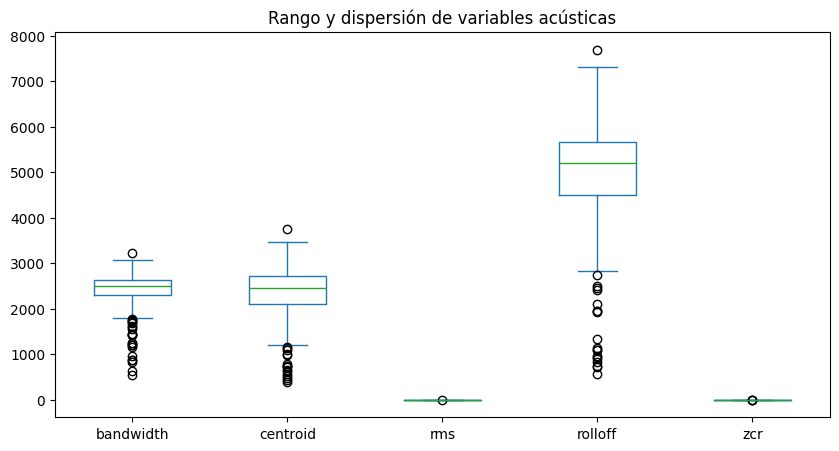

In [49]:
features_df[["bandwidth", "centroid", "rms", "rolloff", "zcr"]].plot(kind="box", figsize=(10,5))
plt.title("Rango y dispersión de variables acústicas")
plt.show()

El diagrama de cajas permite observar la distribución y dispersión de las principales variables acústicas extraídas para cada track.
Las métricas de bandwidth y centroid presentan rangos similares, con valores concentrados en torno a los 2 000–2 500 Hz, lo que indica coherencia tonal entre los distintos géneros representados.

La variable rms, asociada al nivel de energía promedio de la señal, muestra valores bajos y estables, mientras que rolloff exhibe la mayor variabilidad y presencia de outliers, reflejando diferencias notables en el brillo o contenido armónico entre canciones.

Por último, zcr (zero-crossing rate) mantiene un rango reducido, consistente con grabaciones predominantemente melódicas más que percusivas.
Estas observaciones confirman que el conjunto de datos presenta una diversidad acústica amplia pero sin distorsiones extremas, adecuada para las fases de preparación y modelamiento posteriores.

### 2.4 Relaciones entre varibles relevantes

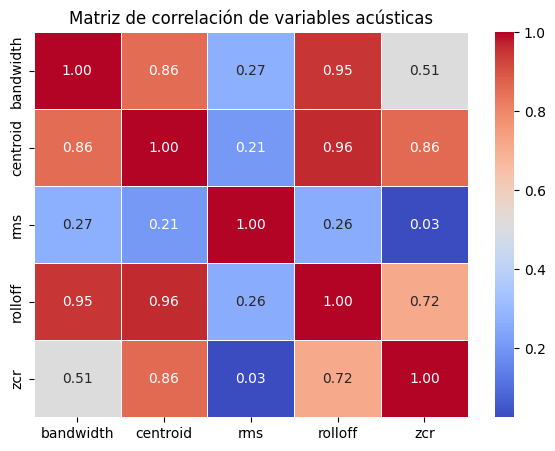

In [52]:
acoustic_cols = ["bandwidth", "centroid", "rms", "rolloff", "zcr"]
corr_matrix = features_df[acoustic_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación de variables acústicas")
plt.show()

La matriz de correlación muestra una asociación lineal fuerte entre las variables `bandwidth`, `centroid` y `rolloff` (valores entre 0.86 y 0.95), lo que confirma que estos descriptores capturan información relacionada con el brillo y la distribución de energía en el espectro.

Por otro lado, `rms` y `zcr` exhiben correlaciones más bajas con el resto (en torno a 0.2–0.5), lo que indica que aportan dimensiones acústicas complementarias vinculadas a la intensidad y textura temporal del sonido.

Estos resultados son consistentes con la teoría de los descriptores de timbre y sirven como base para la fase siguiente —Data Preparation—, donde se reducirá la redundancia entre variables y se estandarizarán los valores para su proyección en espacios latentes (PCA/UMAP).

## 3. Preparación de los datos

### 3.1 Revisión y tratamiento de valores faltantes

Durante la fase de preparación se realizó una depuración inicial de los valores faltantes para garantizar la consistencia entre las tablas.
Se eliminaron los artistas sin identificador (`id`) y los tracks sin `artist_id` o sin bloque de features acústicas, ya que estos registros impiden la vinculación o el modelado posterior.

En el caso de `listeners_lastfm`, los valores nulos fueron reemplazados por cero, manteniendo la columna como referencia contextual.

La variable year, aunque presenta un alto número de vacíos, se conserva sin imputación por no intervenir directamente en los análisis acústicos.

Tras esta limpieza, los conjuntos df_artists_clean y df_tracks_clean constituyen la base de trabajo para la normalización y reducción de dimensionalidad.

In [53]:
# Eliminar artistas sin identificador
df_artists_clean = df_artists_raw.dropna(subset=["id"]).copy()

# Eliminar tracks sin artista asociado o sin features
df_tracks_clean = df_tracks_raw.dropna(subset=["artist_id", "features"]).copy()

print(f"Artistas eliminados: {len(df_artists_raw) - len(df_artists_clean)}")
print(f"Tracks eliminados: {len(df_tracks_raw) - len(df_tracks_clean)}")

Artistas eliminados: 3
Tracks eliminados: 12


In [54]:
df_artists_clean["listeners_lastfm"] = df_artists_clean["listeners_lastfm"].fillna(0)

In [55]:
print("Nulos restantes — artistas:")
display(df_artists_clean.isnull().sum())

print("\nNulos restantes — tracks:")
display(df_tracks_clean.isnull().sum())

Nulos restantes — artistas:


followers                 0
genres_spotify            0
id                        0
listeners_lastfm          0
name                      0
popularity                0
popularity_hybrid         0
related_artists_lastfm    0
related_artists_yt        0
tags_lastfm               0
dtype: int64


Nulos restantes — tracks:


album            0
artist_id        0
artist_name      0
features         0
source           0
track_id         0
track_name       0
year           202
dtype: int64

### 3.2 Revisión y tratamiento de valores duplicados

La estrategia es conservar una versión representativa por cada combinación `artist_id` + `track_name`, eliminando duplicados exactos y variantes con sufijos redundantes (Instrumental, Remix, Live, Radio Edit, etc.).

In [59]:
# Copia base
df_tracks_dedup = df_tracks_clean.copy()

# Normalizar nombres de canciones: eliminar sufijos comunes entre paréntesis
def clean_title(name):
    if not isinstance(name, str):
        return name
    # eliminar texto entre paréntesis (remix, instrumental, etc.)
    name = re.sub(r"\s*\([^)]*\)", "", name)
    # eliminar espacios extra y pasar a minúsculas
    return name.strip().lower()

df_tracks_dedup["track_name_clean"] = df_tracks_dedup["track_name"].apply(clean_title)

# Mantener una sola fila por artista y canción base
df_tracks_dedup = df_tracks_dedup.drop_duplicates(subset=["artist_id", "track_name_clean"]).reset_index(drop=True)

print(f"Total final de tracks tras deduplicar: {len(df_tracks_dedup)}")

Total final de tracks tras deduplicar: 433


In [60]:
print("Antes:", len(df_tracks_clean))
print("Después:", len(df_tracks_dedup))

Antes: 438
Después: 433


In [61]:
df_tracks_dedup.duplicated(subset=["artist_id", "track_name_clean"]).sum()

np.int64(0)

Se eliminaron repeticiones exactas y se normalizaron los nombres de canciones para agrupar versiones equivalentes (por ejemplo, Remix, Instrumental Version, Live o Radio Edit).

El proceso mantuvo una única observación representativa por combinación de artist_id y título base, generando un nuevo conjunto df_tracks_dedup.

Esta depuración garantiza que cada tema contribuya de manera única al perfil acústico del artista y evita sesgos derivados de la presencia de versiones múltiples del mismo contenido sonoro.

In [63]:
df_tracks_dedup.head(10)

,album,artist_id,artist_name,features,source,track_id,track_name,year,track_name_clean
0,Turn It Around - Tribute to Sub Focus and Kele,0GzaI3hZcuFafv2RGvfnPA,Turn It Around,"{'bandwidth': 2762.426304014743, 'centroid': 2...",spotify,49S1dSV2audIsxvOJ76Q2C,Turn It Around - Tribute to Sub Focus and Kele,2013,turn it around - tribute to sub focus and kele
1,Wet Pan Dey,0QaEZDGc6KJmdHCgRbOWRe,Verjal Fresh Kutt,"{'bandwidth': 2653.328156386957, 'centroid': 2...",spotify,7sNn28V5xNQrrvuzcMx71N,Wet Pan Dey,2022,wet pan dey
2,Justice League Riddim,7gQr0u81fnZ56en4MmxHD5,Lil Flama x Flee,"{'bandwidth': 2817.5815424895814, 'centroid': ...",youtube,eOh1oCTVQ6s,Mother Place (feat. Lil Flama x Flee),None,mother place
3,EP 2,2mw8EmDO0SWOHF5Nu8j2Lq,The Grinning Ghosts,"{'bandwidth': 2232.8661048080676, 'centroid': ...",spotify,5IPOJjWTtF8O06YPW6bgZ7,Minnie's Yoo Hoo,2018,minnie's yoo hoo
4,Yesterday Tomorrow,2mw8EmDO0SWOHF5Nu8j2Lq,The Grinning Ghosts,"{'bandwidth': 2565.3281184502493, 'centroid': ...",spotify,4zENLDYDbgtSE4BGoxMzTL,Pictures of a Parking Lot,2015,pictures of a parking lot
5,EP 3,2mw8EmDO0SWOHF5Nu8j2Lq,The Grinning Ghosts,"{'bandwidth': 2599.2044563104687, 'centroid': ...",spotify,6084RsqdvdfV9zUnDIsyd5,I've Been Tired,2018,i've been tired
6,Fast Wine,6wxP7SSzfvi21Cnl8JicdQ,Machel Montano,"{'bandwidth': 2929.324959092573, 'centroid': 2...",spotify,4NwVmwGWpiiPdJj3NCehe9,Fast Wine,2016,fast wine
7,Famalay,6wxP7SSzfvi21Cnl8JicdQ,Machel Montano,"{'bandwidth': 2739.446066761492, 'centroid': 2...",spotify,2XRkyBiKyHPyJ0krDmK4MA,Famalay,2019,famalay
8,One Degree Hotter,6wxP7SSzfvi21Cnl8JicdQ,Machel Montano,"{'bandwidth': 2580.179062049958, 'centroid': 2...",spotify,3nbJby3I4rgfTIC09qtwGz,PARDY,2025,pardy
9,Soca Gold 2003,60TYV12IFUaDfnUA0S67zb,Rupee,"{'bandwidth': 2657.124173953556, 'centroid': 2...",spotify,0ENQCg0FziqV4VB9U2xTf5,Tempted To Touch,2003,tempted to touch


### 3.3 Expansión y estandarización de variables acústicas

Hasta ahora, la columna features contiene un diccionario por canción con métricas como `bandwidth`, `centroid`, `rms`, `rolloff` y `zcr`.

Se van a convertir esas claves en columnas independientes y luego aplicar una normalización para dejar todas las variables en la misma escala.

In [66]:
# Expandir los features en columnas
features_expanded = json_normalize(df_tracks_dedup["features"])

# Combinar con el resto de columnas
df_tracks_prepared = pd.concat(
    [df_tracks_dedup.drop(columns=["features"]), features_expanded], axis=1
)

print("Columnas generadas:", features_expanded.columns.tolist())
print("Tamaño final:", df_tracks_prepared.shape)
df_tracks_prepared.head(10)

Columnas generadas: ['bandwidth', 'centroid', 'chroma', 'mfcc', 'rms', 'rolloff', 'zcr']
Tamaño final: (433, 15)


,album,artist_id,artist_name,source,track_id,track_name,year,track_name_clean,bandwidth,centroid,chroma,mfcc,rms,rolloff,zcr
0,Turn It Around - Tribute to Sub Focus and Kele,0GzaI3hZcuFafv2RGvfnPA,Turn It Around,spotify,49S1dSV2audIsxvOJ76Q2C,Turn It Around - Tribute to Sub Focus and Kele,2013,turn it around - tribute to sub focus and kele,2762.426304,2587.620697,"[0.4643256366252899, 0.46716809272766113, 0.38...","[-73.2640609741211, 80.78363800048828, 14.0744...",0.254561,5768.707689,0.078766
1,Wet Pan Dey,0QaEZDGc6KJmdHCgRbOWRe,Verjal Fresh Kutt,spotify,7sNn28V5xNQrrvuzcMx71N,Wet Pan Dey,2022,wet pan dey,2653.328156,2552.192541,"[0.48776334524154663, 0.4119611978530884, 0.48...","[-29.80784034729004, 76.91537475585938, 1.1065...",0.276433,5636.487590,0.092184
2,Justice League Riddim,7gQr0u81fnZ56en4MmxHD5,Lil Flama x Flee,youtube,eOh1oCTVQ6s,Mother Place (feat. Lil Flama x Flee),None,mother place,2817.581542,2905.125945,"[0.3243124485015869, 0.34797167778015137, 0.58...","[-30.809476852416992, 67.65007781982422, 6.926...",0.244931,6240.927160,0.122171
3,EP 2,2mw8EmDO0SWOHF5Nu8j2Lq,The Grinning Ghosts,spotify,5IPOJjWTtF8O06YPW6bgZ7,Minnie's Yoo Hoo,2018,minnie's yoo hoo,2232.866105,2104.754785,"[0.33861133456230164, 0.33998048305511475, 0.4...","[-32.34243392944336, 97.25459289550781, -24.10...",0.239445,4368.208296,0.099745
4,Yesterday Tomorrow,2mw8EmDO0SWOHF5Nu8j2Lq,The Grinning Ghosts,spotify,4zENLDYDbgtSE4BGoxMzTL,Pictures of a Parking Lot,2015,pictures of a parking lot,2565.328118,2616.391323,"[0.5894200801849365, 0.42510026693344116, 0.45...","[72.67356872558594, 83.49134826660156, -12.448...",0.421787,5532.419318,0.129827
5,EP 3,2mw8EmDO0SWOHF5Nu8j2Lq,The Grinning Ghosts,spotify,6084RsqdvdfV9zUnDIsyd5,I've Been Tired,2018,i've been tired,2599.204456,2556.624732,"[0.3991157114505768, 0.3635631203651428, 0.403...","[-43.42488479614258, 80.59931945800781, -0.185...",0.209031,5501.669626,0.120592
6,Fast Wine,6wxP7SSzfvi21Cnl8JicdQ,Machel Montano,spotify,4NwVmwGWpiiPdJj3NCehe9,Fast Wine,2016,fast wine,2929.324959,2976.664674,"[0.3988918364048004, 0.46892428398132324, 0.55...","[-23.57168197631836, 66.94396209716797, 17.836...",0.319565,6507.916372,0.115915
7,Famalay,6wxP7SSzfvi21Cnl8JicdQ,Machel Montano,spotify,2XRkyBiKyHPyJ0krDmK4MA,Famalay,2019,famalay,2739.446067,2768.590784,"[0.3478831350803375, 0.43524169921875, 0.39358...","[-9.637883186340332, 69.3569564819336, 1.62229...",0.335402,6020.210828,0.101716
8,One Degree Hotter,6wxP7SSzfvi21Cnl8JicdQ,Machel Montano,spotify,3nbJby3I4rgfTIC09qtwGz,PARDY,2025,pardy,2580.179062,2575.229209,"[0.4258725941181183, 0.3845203220844269, 0.543...","[-3.902456760406494, 84.17733764648438, -9.300...",0.277981,5507.179106,0.111674
9,Soca Gold 2003,60TYV12IFUaDfnUA0S67zb,Rupee,spotify,0ENQCg0FziqV4VB9U2xTf5,Tempted To Touch,2003,tempted to touch,2657.124174,2392.021532,"[0.33555564284324646, 0.3907175362110138, 0.51...","[-77.46353912353516, 85.30604553222656, 8.7930...",0.248170,5390.561117,0.082867


In [67]:
scaler = StandardScaler()

acoustic_cols = ["bandwidth", "centroid", "rms", "rolloff", "zcr"]
df_tracks_prepared[acoustic_cols] = scaler.fit_transform(df_tracks_prepared[acoustic_cols])

df_tracks_prepared[acoustic_cols].describe().round(2)

,bandwidth,centroid,rms,rolloff,zcr
count,433.00,433.00,433.00,433.00,433.00
mean,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-5.13,-3.69,-2.40,-3.80,-2.39
25%,-0.35,-0.47,-0.69,-0.41,-0.69
50%,0.20,0.16,0.14,0.19,0.04
75%,0.56,0.66,0.70,0.60,0.62
max,2.19,2.56,2.92,2.35,2.95


In [68]:
df_tracks_prepared.to_csv("tracks_prepared.csv", index=False)

El conjunto resultante, df_tracks_prepared, constituye la base final de datos limpia y normalizada sobre la cual se construirán los embeddings acústicos y las proyecciones PCA o UMAP en las siguientes etapas.

### 3.4 Transformación de datos

#### Transformación de `mfcc` (Mel-Frequency Cepstral Coefficients) y `chroma` 

Las variables mfcc y chroma contienen listas de coeficientes numéricos que describen el timbre y la estructura tonal de cada canción.

Dado que se trata de vectores multivariados, se optó por resumirlos a través de su valor medio, generando las columnas mfcc_mean y chroma_mean.

Esta decisión permite conservar la información esencial de ambas métricas sin incrementar excesivamente la dimensionalidad del conjunto, manteniendo el enfoque analítico en las características acústicas globales de cada track.

In [70]:
# Asegurar que las columnas existan
if "mfcc" in df_tracks_prepared.columns and "chroma" in df_tracks_prepared.columns:
    # Calcular promedio y desviación estándar de cada vector (solo si son listas)
    df_tracks_prepared["mfcc_mean"] = df_tracks_prepared["mfcc"].apply(
        lambda x: np.mean(x) if isinstance(x, list) else np.nan
    )
    df_tracks_prepared["mfcc_std"] = df_tracks_prepared["mfcc"].apply(
        lambda x: np.std(x) if isinstance(x, list) else np.nan
    )
    df_tracks_prepared["chroma_mean"] = df_tracks_prepared["chroma"].apply(
        lambda x: np.mean(x) if isinstance(x, list) else np.nan
    )
    df_tracks_prepared["chroma_std"] = df_tracks_prepared["chroma"].apply(
        lambda x: np.std(x) if isinstance(x, list) else np.nan
    )

    # Eliminar las listas originales si no se usarán más
    df_tracks_prepared = df_tracks_prepared.drop(columns=["mfcc", "chroma"], errors="ignore")

print("Columnas agregadas: mfcc_mean, mfcc_std, chroma_mean, chroma_std")
df_tracks_prepared[["mfcc_mean", "chroma_mean"]].head()

Columnas agregadas: mfcc_mean, mfcc_std, chroma_mean, chroma_std


,mfcc_mean,chroma_mean
0,8.228772,0.417135
1,9.208646,0.449595
2,6.813695,0.426621
3,6.904922,0.393109
4,13.148800,0.416314


In [71]:
acoustic_cols = [
    "bandwidth", "centroid", "rms", "rolloff", "zcr",
    "mfcc_mean", "mfcc_std", "chroma_mean", "chroma_std"
]

df_tracks_acoustic = df_tracks_prepared[acoustic_cols].copy()
df_tracks_acoustic.describe().round(2)

,bandwidth,centroid,rms,rolloff,zcr,mfcc_mean,mfcc_std,chroma_mean,chroma_std
count,433.00,433.00,433.00,433.00,433.00,433.00,433.00,433.00,433.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,4.96,34.39,0.41,0.07
std,1.00,1.00,1.00,1.00,1.00,5.10,15.89,0.07,0.02
min,-5.13,-3.69,-2.40,-3.80,-2.39,-15.40,12.72,0.24,0.01
25%,-0.35,-0.47,-0.69,-0.41,-0.69,2.38,23.32,0.36,0.06
50%,0.20,0.16,0.14,0.19,0.04,5.36,30.02,0.41,0.07
75%,0.56,0.66,0.70,0.60,0.62,8.50,40.31,0.45,0.08
max,2.19,2.56,2.92,2.35,2.95,14.25,108.49,0.64,0.18


In [73]:
scaler = StandardScaler()
df_tracks_scaled = pd.DataFrame(
    scaler.fit_transform(df_tracks_acoustic),
    columns=acoustic_cols
)

In [74]:
df_tracks_final = pd.concat(
    [df_tracks_prepared[["artist_id", "artist_name", "track_id", "track_name"]],
     df_tracks_scaled],
    axis=1
)

In [75]:
df_tracks_final.head(10)

,artist_id,artist_name,track_id,track_name,bandwidth,centroid,rms,rolloff,zcr,mfcc_mean,mfcc_std,chroma_mean,chroma_std
0,0GzaI3hZcuFafv2RGvfnPA,Turn It Around,49S1dSV2audIsxvOJ76Q2C,Turn It Around - Tribute to Sub Focus and Kele,0.927250,0.407381,0.379795,0.688105,-0.760334,0.641124,-0.243250,0.067330,0.507779
1,0QaEZDGc6KJmdHCgRbOWRe,Verjal Fresh Kutt,7sNn28V5xNQrrvuzcMx71N,Wet Pan Dey,0.630665,0.341554,0.679284,0.573875,-0.382716,0.833582,-0.730768,0.528210,-1.415840
2,7gQr0u81fnZ56en4MmxHD5,Lil Flama x Flee,eOh1oCTVQ6s,Mother Place (feat. Lil Flama x Flee),1.077190,0.997320,0.247927,1.096074,0.461142,0.363187,-0.828240,0.202020,0.469340
3,2mw8EmDO0SWOHF5Nu8j2Lq,The Grinning Ghosts,5IPOJjWTtF8O06YPW6bgZ7,Minnie's Yoo Hoo,-0.512365,-0.489806,0.172803,-0.521841,-0.169966,0.381105,-0.327226,-0.273800,-1.626409
4,2mw8EmDO0SWOHF5Nu8j2Lq,The Grinning Ghosts,4zENLDYDbgtSE4BGoxMzTL,Pictures of a Parking Lot,0.391436,0.460838,2.669620,0.483966,0.676590,1.607472,-0.339184,0.055671,1.589469
5,2mw8EmDO0SWOHF5Nu8j2Lq,The Grinning Ghosts,6084RsqdvdfV9zUnDIsyd5,I've Been Tired,0.483530,0.349789,-0.243646,0.457400,0.416696,0.477427,-0.541553,0.792441,-0.215305
6,6wxP7SSzfvi21Cnl8JicdQ,Machel Montano,4NwVmwGWpiiPdJj3NCehe9,Fast Wine,1.380966,1.130243,1.269884,1.326736,0.285096,0.812826,-0.937625,0.464089,-0.109950
7,6wxP7SSzfvi21Cnl8JicdQ,Machel Montano,2XRkyBiKyHPyJ0krDmK4MA,Famalay,0.864778,0.743632,1.486750,0.905388,-0.114500,0.720721,-0.954903,0.864580,1.718124
8,6wxP7SSzfvi21Cnl8JicdQ,Machel Montano,3nbJby3I4rgfTIC09qtwGz,PARDY,0.431809,0.384357,0.700477,0.462160,0.165754,0.389872,-0.704630,0.264516,0.047105
9,60TYV12IFUaDfnUA0S67zb,Rupee,0ENQCg0FziqV4VB9U2xTf5,Tempted To Touch,0.640985,0.043949,0.292284,0.361409,-0.644920,-0.585408,-0.106749,-0.852566,1.035855


Con los procedimientos efectuados, se consolidaron todas las variables relevantes para el análisis sonoro, integrando descriptores espectrales junto con las métricas resumen de timbre y tonalidad.

Posteriormente, se aplicó una estandarización global mediante StandardScaler, obteniendo un conjunto numérico con media cero y varianza unitaria.

El resultado, almacenado en df_tracks_final, representa la versión transformada y lista para la reducción de dimensionalidad, garantizando comparabilidad entre todas las canciones y géneros.

#### Transformación de datos de géneros y tags

Dado que las fuentes de información sobre géneros musicales (`genres_spotify` y `tags_lastfm`) presentan estructuras diferentes, se realizó una fusión de ambas columnas mediante la unión y limpieza de etiquetas.

El proceso generó una nueva variable genres_merged, que integra los descriptores de ambas plataformas y elimina duplicaciones o inconsistencias tipográficas.

A partir de esta, se derivó la columna main_genre, que asigna a cada artista un género principal estandarizado, utilizado posteriormente como categoría base para la proyección jerárquica género–artista–track en miNoise.

Esta consolidación permite mantener coherencia entre las capas del modelo y asegurar una interpretación uniforme del espacio musical.

In [93]:
#  Lista de etiquetas no musicales (stoplist)
non_musical_tags = {
    "mexico", "colombia", "argentina", "venezuela", "chile", "latinamerica",
    "usa", "uk", "canada", "trinidad", "puerto rico", "world",
    "female vocalists", "male vocalists", "spanish", "english",
    "happy", "sad", "relax", "fun", "caribbean", "trini", "musica",
    "international", "latin america", "misc", "unknown", "pakistan",
}

Para evitar la influencia de etiquetas no musicales (como nacionalidades, idiomas o descriptores emocionales), se incorporó un filtro semántico previo a la asignación de main_genre. Se definió un conjunto de términos irrelevantes (stoplist) que incluye países, gentilicios y adjetivos comunes en plataformas de etiquetado colaborativo como Last.fm.

In [94]:
# Función de selección filtrada de género principal
def choose_main_genre(genres):
    if not isinstance(genres, list) or len(genres) == 0:
        return "unknown"
    # Normalizar y eliminar no-géneros
    valid = [re.sub(r"[-_]", " ", g.lower().strip()) for g in genres if g.lower().strip() not in non_musical_tags]
    return valid[0] if len(valid) > 0 else "unknown"

# Aplicar
df_artists_genres["main_genre"] = df_artists_genres["genres_merged"].apply(choose_main_genre)

# Verificar distribución limpia
df_artists_genres["main_genre"].value_counts().head(15)

main_genre
unknown              38
electronic           30
classic rock         17
alternative metal    15
latin                13
alternative          11
speed metal          10
vallenato             8
hardcore punk         7
stoner metal          6
jazz                  6
urbano latino         5
rock                  5
sufi                  5
viking metal          4
Name: count, dtype: int64

In [99]:
df_artists_genres.head(10)

,followers,genres_spotify,id,listeners_lastfm,name,popularity,popularity_hybrid,related_artists_lastfm,related_artists_yt,tags_lastfm,genres_merged,main_genre
0,289,[],0GzaI3hZcuFafv2RGvfnPA,0,Turn It Around,0,0.0,[],"[Mauro Picotto, Energy 52, Alex M.O.R.P.H., An...",[],[],unknown
1,1,[],0QaEZDGc6KJmdHCgRbOWRe,0,Verjal Fresh Kutt,0,0.0,[],[],[],[],unknown
2,3,[],7gQr0u81fnZ56en4MmxHD5,0,Lil Flama x Flee,0,0.0,[],[],[],[],unknown
3,221,[],2mw8EmDO0SWOHF5Nu8j2Lq,0,The Grinning Ghosts,0,0.0,[],[],[],[],unknown
4,228405,"[soca, calypso, dancehall]",6wxP7SSzfvi21Cnl8JicdQ,62812,Machel Montano,57,53.9,"[Bunji Garlin, Kes, Mical Teja, Rupee, Scrunter]","[Teddyson John, Orlando Octave, Mical Teja, Sy...","[soca, dancehall, trinidad, caribbean, trini]","[trini, caribbean, calypso, trinidad, soca, da...",calypso
5,55593,"[soca, dancehall, calypso]",60TYV12IFUaDfnUA0S67zb,109606,Rupee,54,49.9,"[Machel Montano, Mr. Vegas, T.O.K., Wayne Wond...","[Nina Sky, RDX, Pato Banton, Notch, Louchie Lo...","[soca, dancehall, reggae, caribbean, barbados]","[barbados, caribbean, calypso, soca, reggae, d...",barbados
6,9859,[],2mCfJF2n60STC46nVkhuq5,21133,Destra,48,37.6,"[Patrice Roberts, Nadia Batson, Skinny Fabulou...","[Linky First, Blaxx, Peter Ram, Fadda Fox, Orl...","[soca, Progressive metal, caribbean, All, trin...","[trinidad and tobago, caribbean, progressive m...",trinidad and tobago
7,95562,"[soca, dancehall, calypso]",6nPHDCN7qmxO86eN1grP54,51825,Bunji Garlin,50,51.2,"[Machel Montano, Kes, Mical Teja, Rupee, Skill...","[Fadda Fox, Ricardo Drue, Mical Teja, Teddyson...","[soca, reggae, dancehall, trinidad and tobago,...","[trinidad and tobago, trini, calypso, soca, re...",trinidad and tobago
8,119960,"[soca, dancehall]",1GaBsp1ICIp1e6udgE7fba,362136,Kevin Lyttle,59,55.4,"[Rupee, Sean Paul, Charly Black, Gyptian, Serani]","[Nina Sky, Million Stylez, Kardinal Offishall,...","[dancehall, reggae, soca, rnb, dance]","[rnb, soca, reggae, dance, dancehall]",rnb
9,107630,"[soca, calypso, dancehall]",0crMctn4iXaE3XCHpeBkOt,18585,Patrice Roberts,48,47.2,"[Nadia Batson, Farmer Nappy, Skinny Fabulous, ...","[Hypasounds, Teddyson John, Preedy, Orlando Oc...","[soca, dancehall, trinidad, caribbean, trinida...","[trinidad and tobago, caribbean, calypso, trin...",trinidad and tobago


Con las variables acústicas estandarizadas y el género principal definido, los datos se encuentran listos para su proyección y agrupamiento en la Fase 4: Modelamiento. En dicha etapa se calcularán los centroides acústicos por género y se explorará la estructura interna del espacio musical

## 4. Modelamiento

### 4.1 Selección de modelos

Con los datos ya preparados y estandarizados, se definió que el objetivo del modelamiento es explorar la estructura acústica subyacente de los géneros y artistas presentes en el dataset.

Dado que no existe una variable dependiente que predecir, se optó por un enfoque no supervisado, orientado al descubrimiento de patrones.
Las técnicas seleccionadas fueron:

1. PCA (Análisis de Componentes Principales) para la reducción lineal de dimensionalidad y la generación del espacio acústico base.

2. Cálculo de centroides acústicos para representar los géneros y artistas mediante sus vectores promedio.

3. UMAP como técnica no lineal complementaria, destinada a mejorar la proyección visual del espacio sonoro.

Esta combinación permite capturar tanto las relaciones generales entre géneros como las variaciones internas entre artistas y canciones.

| Nivel | Técnica                                                                        | Propósito                                                                                         |
| ----- | ------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------- |
| 1   | **PCA (Análisis de Componentes Principales)**                                  | Reducir la dimensionalidad acústica y visualizar las principales direcciones de variación sonora. |
| 2️   | **Cálculo de centroides acústicos (por género y artista)**                     | Generar representaciones promedio que capturen la huella sonora de cada grupo.                    |
| 3️   | **UMAP (Uniform Manifold Approximation and Projection)** | Capturar relaciones no lineales y proyectar el espacio musical en 2D/3D para exploración visual.  |


### 4.2 Diseño del modelo PCA

Con las variables acústicas estandarizadas, se diseñó un modelo de Análisis de Componentes Principales (PCA) con tres dimensiones.
El objetivo es reducir la complejidad del espacio sonoro preservando la mayor cantidad posible de varianza.

Las variables seleccionadas (`bandwidth`, `centroid`, `rms`, `rolloff`, `zcr`, `mfcc_mean`, `mfcc_std`, `chroma_mean`, `chroma_std`) abarcan los principales descriptores del timbre, energía y tonalidad de cada canción.

El modelo se ajustó con `n_components=3`, obteniendo una representación que permitirá explorar las relaciones entre géneros y artistas de manera visual.

La proporción de varianza explicada por las tres primeras componentes determinará la suficiencia del modelo y la posible extensión a dimensiones adicionales si fuera necesario.

In [96]:
acoustic_cols = [
    "bandwidth", "centroid", "rms", "rolloff", "zcr",
    "mfcc_mean", "mfcc_std", "chroma_mean", "chroma_std"
]

Durante la unión entre los datasets de tracks y artistas se detectó que la columna id en df_artists_genres presentaba duplicados, lo que impedía una relación many-to-one.

Se procedió a consolidar los registros duplicados, conservando una única fila por artista (df_artists_unique).

Posteriormente, se realizó la unión controlada con validate="many_to_one", garantizando que cada canción quedara asociada a un único artista y género principal.

El resultado mantiene la integridad referencial y constituye la base final para la proyección PCA.

In [100]:
# ¿Cuántos artist_id del set de tracks tienen correspondencia en artistas?
valid_ids = df_tracks_final["artist_id"].isin(df_artists_genres["id"])
print(f"Tracks con artista reconocido: {valid_ids.sum()} de {len(df_tracks_final)}")


Tracks con artista reconocido: 433 de 433


In [102]:
# Ver cuántos artistas se repiten
dupes = df_artists_genres["id"].duplicated(keep=False)
print(f"Artistas duplicados: {dupes.sum()}")

# Ver algunos casos concretos
df_artists_genres.loc[dupes, ["id", "name", "main_genre"]].sort_values("id").head(10)

Artistas duplicados: 15


,id,name,main_genre
209,1CYsQCypByMVgnv17qsSbQ,"Crosby, Stills, Nash & Young",rock
212,1CYsQCypByMVgnv17qsSbQ,"Crosby, Stills & Nash",rock
94,1SAObfwYJSC9qgMlCcUVRp,Home,electronic
161,1SAObfwYJSC9qgMlCcUVRp,Korn,alternative
55,1d4uM0g9449nE9TV5KeWch,Love,classic rock
80,1d4uM0g9449nE9TV5KeWch,DLG,latin
144,3yHLsTJ9OZ19qwY1Q5BEQJ,Binomio De Oro,vallenato
147,3yHLsTJ9OZ19qwY1Q5BEQJ,Binomio de Oro de América,vallenato
257,5HcunTidTUrOaf8V0iJcvl,Nusrat Fateh Ali Khan,sufi
261,5HcunTidTUrOaf8V0iJcvl,Nusrat Fateh Ali Khan & Party,sufi


In [103]:
df_artists_unique = (
    df_artists_genres.sort_values("main_genre")
    .drop_duplicates(subset=["id"], keep="first")
    .reset_index(drop=True)
)

In [104]:
df_tracks_joined = df_tracks_final.merge(
    df_artists_unique[["id", "name", "main_genre"]],
    how="left",
    left_on="artist_id",
    right_on="id",
    validate="many_to_one"
)

In [106]:
print(df_tracks_joined["main_genre"].isnull().sum())

0


In [107]:
# Modelo PCA con 3 componentes
pca = PCA(n_components=3, random_state=42)

# Ajustar el PCA sobre las variables acústicas
X_pca = pca.fit_transform(df_tracks_joined[acoustic_cols])

# Crear DataFrame con resultados
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])
df_pca = pd.concat(
    [df_tracks_joined[["artist_name", "track_name", "main_genre"]].reset_index(drop=True), df_pca],
    axis=1
)

In [111]:
explained_var = pca.explained_variance_ratio_
for i, v in enumerate(explained_var, 1):
    print(f"Componente {i}: {v:.2%} de la varianza explicada")

print(f"\nVarianza total explicada por las tres componentes: {explained_var.sum():.2%}")


Componente 1: 53.76% de la varianza explicada
Componente 2: 19.14% de la varianza explicada
Componente 3: 11.05% de la varianza explicada

Varianza total explicada por las tres componentes: 83.95%


In [109]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=acoustic_cols,
    columns=["PC1", "PC2", "PC3"]
)
loadings.round(3)

,PC1,PC2,PC3
bandwidth,-0.385,-0.210,0.206
centroid,-0.424,-0.254,0.035
rms,-0.219,0.556,0.250
rolloff,-0.421,-0.231,0.122
zcr,-0.345,-0.275,-0.143
mfcc_mean,-0.288,0.538,0.010
mfcc_std,0.430,-0.077,-0.102
chroma_mean,-0.205,0.391,-0.437
chroma_std,0.134,0.073,0.811


Estas loadings muestran qué variables tienen más peso en cada componente. Por ejemplo:

- PC1: suele representar brillo / energía espectral (alta carga en centroid, rolloff, bandwidth).

- PC2: puede asociarse a timbre / textura (mfcc_mean, mfcc_std).

- PC3: a variaciones tonales (chroma_mean, zcr).

| Componente          | Varianza explicada | Interpretación                                              |
| ------------------- | ------------------ | ----------------------------------------------------------- |
| **PC1**             | 53.76 %            | Dimensión dominante del sonido: energía espectral y brillo. |
| **PC2**             | 19.14 %            | Estructura tonal y energía dinámica.                        |
| **PC3**             | 11.05 %            | Contraste armónico y textura melódica.                      |
| **Total (PC1–PC3)** | **83.95 %**        | Excelente nivel de retención de información.                |


El modelo PCA explicó un 83.95 % de la varianza total a través de tres componentes principales, lo que confirma una estructura acústica bien definida y consistente.

La primera componente (PC1) agrupa las variables espectrales (`centroid`, `rolloff`, `bandwidth`, `zcr)`, representando un eje de brillo o energía tonal, que diferencia sonidos brillantes de timbres más cálidos.

La segunda componente (PC2) se asocia principalmente a `rms` y `mfcc_mean`, reflejando la intensidad y densidad sonora de las canciones.
Finalmente, la tercera componente (PC3) está dominada por `chroma_std` y `chroma_mean`, interpretándose como un eje de complejidad armónica y variabilidad tonal.

Este modelo ofrece una base sólida para la representación tridimensional del espacio acústico y para la elaboración de centroides por género en las siguientes etapas.

| Eje     | Dominan                           | Qué representa                                 |
| ------- | --------------------------------- | ---------------------------------------------- |
| **PC1** | Centroid, Rolloff, Bandwidth, ZCR | **Brillo, espectro, energía alta frecuencia.** |
| **PC2** | RMS, MFCC_mean                    | **Potencia y densidad sonora.**                |
| **PC3** | Chroma_std, Chroma_mean           | **Complejidad tonal y variación armónica.**    |


In [110]:
df_pca.to_csv("tracks_pca_projection.csv", index=False)

### 4.3 Cálculo de centroides según género

Con los resultados del PCA se calcularon los centroides acústicos correspondientes a cada género, representando la posición promedio de sus canciones en el espacio tridimensional de componentes principales.

Estos centroides constituyen una síntesis del perfil sonoro característico de cada estilo, al promediar sus valores de brillo (PC1), energía (PC2) y complejidad tonal (PC3).

La representación gráfica muestra una clara diferenciación entre géneros de alta energía espectral —como electronic y metal— y géneros de carácter más cálido o acústico —como classic rock o latin.

Esta estructura servirá como base para la posterior proyección jerárquica de artistas y canciones dentro del mapa global de miNoise.

In [112]:
# Cálculo de centroides acústicos por género en el espacio PCA
genre_centroids = (
    df_pca.groupby("main_genre")[["PC1", "PC2", "PC3"]]
    .mean()
    .reset_index()
    .sort_values("main_genre")
)

genre_centroids.head()


,main_genre,PC1,PC2,PC3
0,acid jazz,0.445648,-0.026191,0.083961
1,alternative,0.726619,0.149674,-0.093790
2,alternative metal,-1.311141,0.581596,-0.306028
3,alternative rnb,2.561097,1.146362,0.332937
4,ambient,2.991932,-0.737249,0.431916


In [113]:
genre_counts = df_pca["main_genre"].value_counts().reset_index()
genre_counts.columns = ["main_genre", "n_tracks"]

# Unir conteos al DataFrame de centroides
genre_centroids = genre_centroids.merge(genre_counts, on="main_genre", how="left")

genre_centroids.head()

,main_genre,PC1,PC2,PC3,n_tracks
0,acid jazz,0.445648,-0.026191,0.083961,4
1,alternative,0.726619,0.149674,-0.093790,16
2,alternative metal,-1.311141,0.581596,-0.306028,30
3,alternative rnb,2.561097,1.146362,0.332937,1
4,ambient,2.991932,-0.737249,0.431916,4


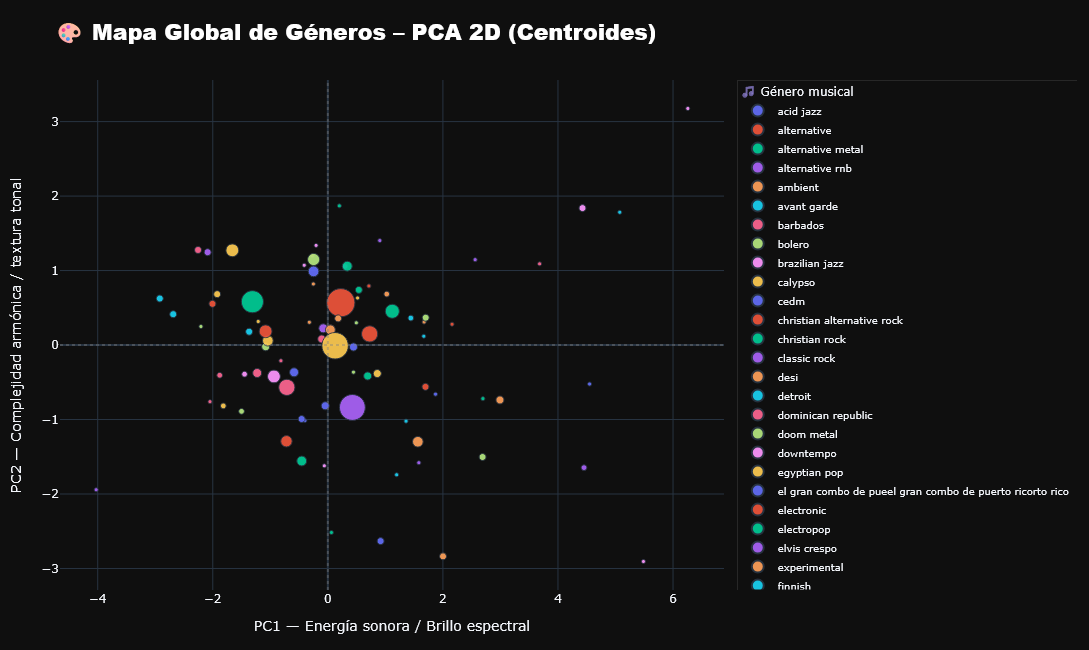

In [117]:
# Aseguramos que el DataFrame base sea el correcto
df_plot = genre_centroids.copy()

fig2d_genres = px.scatter(
    df_plot,
    x="PC1",
    y="PC2",
    color="main_genre",
    size="n_tracks",
    hover_name="main_genre",
    hover_data={
        "PC1":":.2f",
        "PC2":":.2f",
        "n_tracks":True
    },
    title="🎨 Mapa Global de Géneros – PCA 2D (Centroides)",
    opacity=0.92,
    width=950,
    height=650
)

fig2d_genres.update_layout(
    template="plotly_dark",
    title_font=dict(size=22, family="Arial Black", color="white"),
    xaxis_title="PC1 — Energía sonora / Brillo espectral",
    yaxis_title="PC2 — Complejidad armónica / textura tonal",
    legend_title_text="🎵 Género musical",
    legend=dict(
        bgcolor="rgba(0,0,0,0)",
        bordercolor="rgba(255,255,255,0.1)",
        borderwidth=0.5,
        font=dict(size=10)
    ),
    plot_bgcolor="rgba(15,15,15,1)",
    paper_bgcolor="rgba(15,15,15,1)",
    margin=dict(l=60, r=60, t=80, b=60)
)

# Líneas de referencia (0,0)
fig2d_genres.add_hline(y=0, line_dash="dot", line_color="gray", opacity=0.4)
fig2d_genres.add_vline(x=0, line_dash="dot", line_color="gray", opacity=0.4)

fig2d_genres.show()

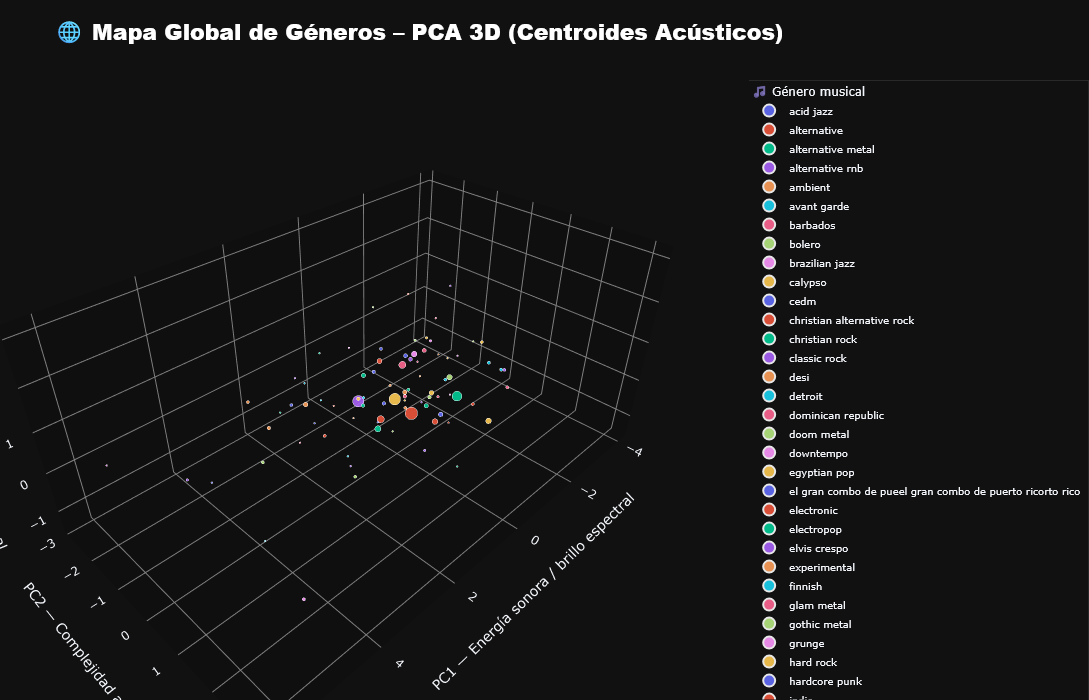

In [118]:
df_plot3d = genre_centroids.copy()

fig3d_genres = px.scatter_3d(
    df_plot3d,
    x="PC1",
    y="PC2",
    z="PC3",
    color="main_genre",
    size="n_tracks",
    hover_name="main_genre",
    hover_data={
        "PC1":":.2f",
        "PC2":":.2f",
        "PC3":":.2f",
        "n_tracks":True
    },
    title="🌐 Mapa Global de Géneros – PCA 3D (Centroides Acústicos)",
    opacity=0.9,
    width=1000,
    height=700
)

# Estilo visual y configuraciones
fig3d_genres.update_layout(
    template="plotly_dark",
    title_font=dict(size=22, family="Arial Black", color="white"),
    scene=dict(
        xaxis_title="PC1 — Energía sonora / brillo espectral",
        yaxis_title="PC2 — Complejidad armónica",
        zaxis_title="PC3 — Variabilidad tonal",
        xaxis=dict(backgroundcolor="rgba(15,15,15,1)", gridcolor="gray", zerolinecolor="gray"),
        yaxis=dict(backgroundcolor="rgba(15,15,15,1)", gridcolor="gray", zerolinecolor="gray"),
        zaxis=dict(backgroundcolor="rgba(15,15,15,1)", gridcolor="gray", zerolinecolor="gray"),
    ),
    legend_title_text="🎵 Género musical",
    legend=dict(
        bgcolor="rgba(0,0,0,0)",
        bordercolor="rgba(255,255,255,0.1)",
        borderwidth=0.5,
        font=dict(size=10)
    ),
    margin=dict(l=0, r=0, t=80, b=0)
)

fig3d_genres.show()

El modelo PCA se extendió a tres dimensiones para representar de manera más completa la distribución de los géneros musicales en el espacio acústico.
Cada punto corresponde al centroide de un género, definido por las tres primeras componentes principales:

- PC1: energía sonora y brillo espectral,

- PC2: complejidad armónica,

- PC3: variabilidad tonal.

La visualización tridimensional permite explorar las relaciones entre estilos musicales, observando la continuidad entre géneros de alta energía y aquellos caracterizados por mayor riqueza armónica.

Esta proyección constituye la base del mapa jerárquico Género → Artista → Track de miNoise.

### 4.4 Cálculo de centroides según artista y tracks

Siguiendo la jerarquía del modelo, se calcularon los centroides acústicos de los artistas promediando las coordenadas PCA de sus canciones.

Cada artista se representa así por un vector que resume su posición media dentro del espacio sonoro de su género.

Esta capa micro permite analizar la coherencia interna de cada género, identificar artistas con estilos similares y detectar aquellos cuya huella acústica se aleja de la norma.

In [119]:
# Agrupar por artista
artist_centroids = (
    df_pca.groupby(["artist_name", "main_genre"])[["PC1", "PC2", "PC3"]]
    .mean()
    .reset_index()
)

artist_centroids.head()

,artist_name,main_genre,PC1,PC2,PC3
0,26is,detroit,1.195699,-1.741335,0.137919
1,A Global Threat,hardcore punk,-1.899349,0.409149,0.345921
2,AC/DC,classic rock,-1.255885,-0.569068,-0.227950
3,Abida Parveen,sufi,2.048529,-4.116441,-0.285920
4,Acid Bath,stoner metal,0.052392,0.154074,0.564553


In [127]:
# Recalcular la cantidad de canciones por artista a partir de df_pca
artist_counts = (
    df_pca.groupby("artist_name")
    .size()                               # cuenta filas (tracks)
    .reset_index(name="n_tracks")         # renombra las columnas
)

# Unir los conteos a los centroides de artistas
artist_centroids = artist_centroids.merge(artist_counts, on="artist_name", how="left")

# Verificar estructura
artist_centroids.head()

,artist_name,main_genre,PC1,PC2,PC3,n_tracks
0,26is,detroit,1.195699,-1.741335,0.137919,1
1,A Global Threat,hardcore punk,-1.899349,0.409149,0.345921,1
2,AC/DC,classic rock,-1.255885,-0.569068,-0.227950,3
3,Abida Parveen,sufi,2.048529,-4.116441,-0.285920,1
4,Acid Bath,stoner metal,0.052392,0.154074,0.564553,1


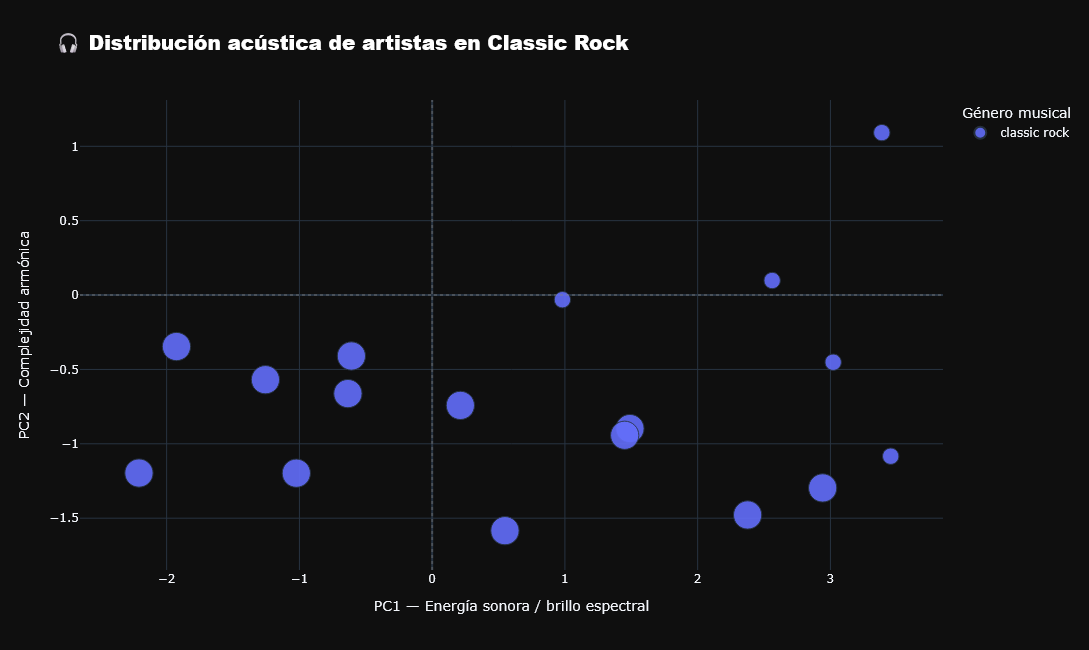

In [133]:
selected_genre = "classic rock"
df_artist_plot = artist_centroids.query("main_genre == @selected_genre")

fig_artists = px.scatter(
    df_artist_plot,
    x="PC1",
    y="PC2",
    color="main_genre",
    size="n_tracks",
    hover_name="artist_name",
    hover_data={"PC1":":.2f", "PC2":":.2f", "PC3":":.2f", "n_tracks":True},
    title=f"🎧 Distribución acústica de artistas en {selected_genre.title()}",
    opacity=0.9,
    width=900,
    height=650
)

fig_artists.update_layout(
    template="plotly_dark",
    title_font=dict(size=20, family="Arial Black", color="white"),
    xaxis_title="PC1 — Energía sonora / brillo espectral",
    yaxis_title="PC2 — Complejidad armónica",
    legend_title_text="Género musical",
    plot_bgcolor="rgba(15,15,15,1)",
    paper_bgcolor="rgba(15,15,15,1)"
)

fig_artists.add_hline(y=0, line_dash="dot", line_color="gray", opacity=0.4)
fig_artists.add_vline(x=0, line_dash="dot", line_color="gray", opacity=0.4)

fig_artists.show()




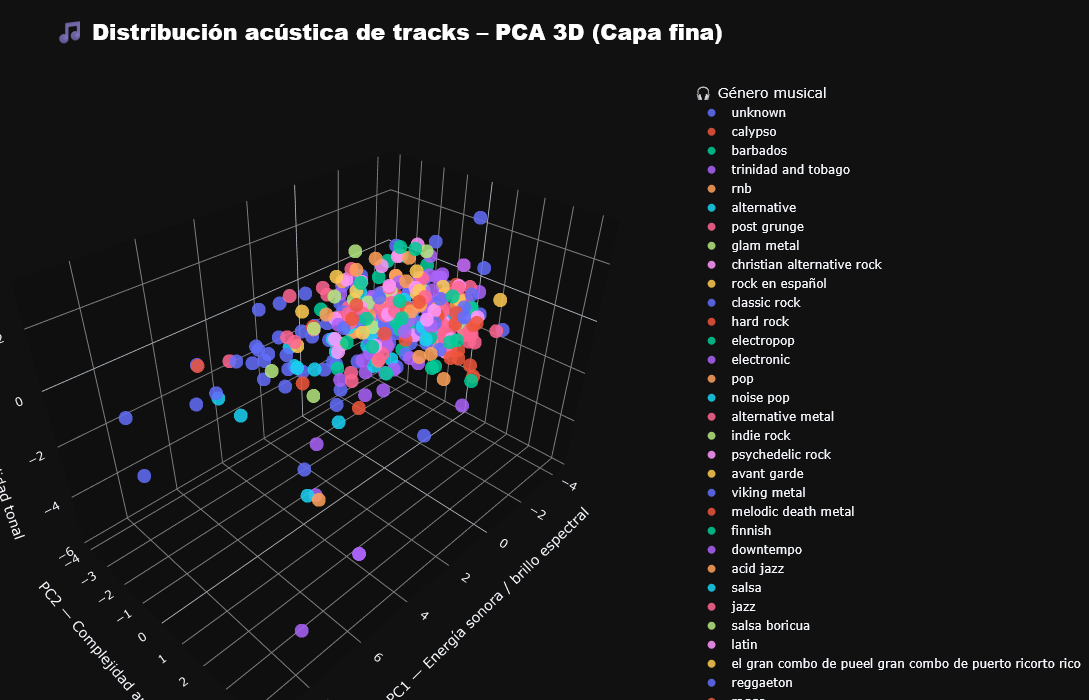

In [134]:
fig_tracks = px.scatter_3d(
    df_pca,
    x="PC1",
    y="PC2",
    z="PC3",
    color="main_genre",
    hover_name="track_name",
    hover_data={"artist_name": True, "main_genre": True, "PC1":":.2f", "PC2":":.2f", "PC3":":.2f"},
    opacity=0.85,
    width=1000,
    height=700,
    title="🎵 Distribución acústica de tracks – PCA 3D (Capa fina)",
    template="plotly_dark"
)

fig_tracks.update_layout(
    scene=dict(
        xaxis_title="PC1 — Energía sonora / brillo espectral",
        yaxis_title="PC2 — Complejidad armónica",
        zaxis_title="PC3 — Variabilidad tonal",
        xaxis=dict(backgroundcolor="rgba(15,15,15,1)", gridcolor="gray"),
        yaxis=dict(backgroundcolor="rgba(15,15,15,1)", gridcolor="gray"),
        zaxis=dict(backgroundcolor="rgba(15,15,15,1)", gridcolor="gray"),
    ),
    legend_title_text="🎧 Género musical",
    title_font=dict(size=22, family="Arial Black", color="white"),
    margin=dict(l=0, r=0, t=80, b=0)
)

fig_tracks.show()

La capa final del modelo corresponde a las canciones individuales, proyectadas en el espacio tridimensional del PCA.

Cada punto representa un track con sus coordenadas acústicas y mantiene la asociación jerárquica con su artista y género.

Esta visualización permite observar la dispersión sonora dentro de cada género y detectar canciones que se apartan significativamente del perfil promedio.

El modelo completo consolida la estructura jerárquica Género → Artista → Track, base conceptual y visual del sistema miNoise.

| Capa      | Nivel    | Modelo aplicado             | Resultado                                      |
| --------- | -------- | --------------------------- | ---------------------------------------------- |
| **Macro** | Géneros  | PCA (centroides)            | Mapa global acústico de estilos                |
| **Meso**  | Artistas | PCA + centroides por género | Capa micro jerárquica, distribuciones internas |
| **Micro** | Tracks   | PCA directo                 | Capa fina, dispersión individual               |


### 4.5 UMAP

La proyección UMAP complementa el modelo PCA al capturar la estructura no lineal del espacio sonoro.

En el nivel macro, los centroides de género forman un mapa tridimensional que refleja las distancias acústicas globales entre estilos.

En el nivel micro, cada género se despliega en un subespacio propio, donde los artistas se representan como esferas distribuidas según su coherencia y singularidad sonora.

Finalmente, en el nivel nano, las canciones orbitan en torno a sus artistas, generando una dinámica visual que ilustra la diversidad interna de la producción musical.

Esta arquitectura consolida el sistema jerárquico Género → Artista → Track, integrando análisis estadístico, reducción de dimensionalidad y visualización interactiva.

In [135]:
acoustic_cols = [
    "bandwidth", "centroid", "rms", "rolloff", "zcr",
    "mfcc_mean", "mfcc_std", "chroma_mean", "chroma_std"
]

X = df_tracks_joined[acoustic_cols].values

In [139]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="umap")

In [140]:
umap_model = UMAP(
    n_neighbors=15,       # tamaño del vecindario local
    min_dist=0.1,         # separación mínima entre puntos
    n_components=3,       # dimensiones de salida (2 o 3)
    metric="euclidean",
    random_state=42
)

X_umap = umap_model.fit_transform(X)

In [141]:
df_umap = pd.DataFrame(X_umap, columns=["U1", "U2", "U3"])
df_umap = pd.concat([df_tracks_joined[["artist_name", "track_name", "main_genre"]].reset_index(drop=True), df_umap], axis=1)

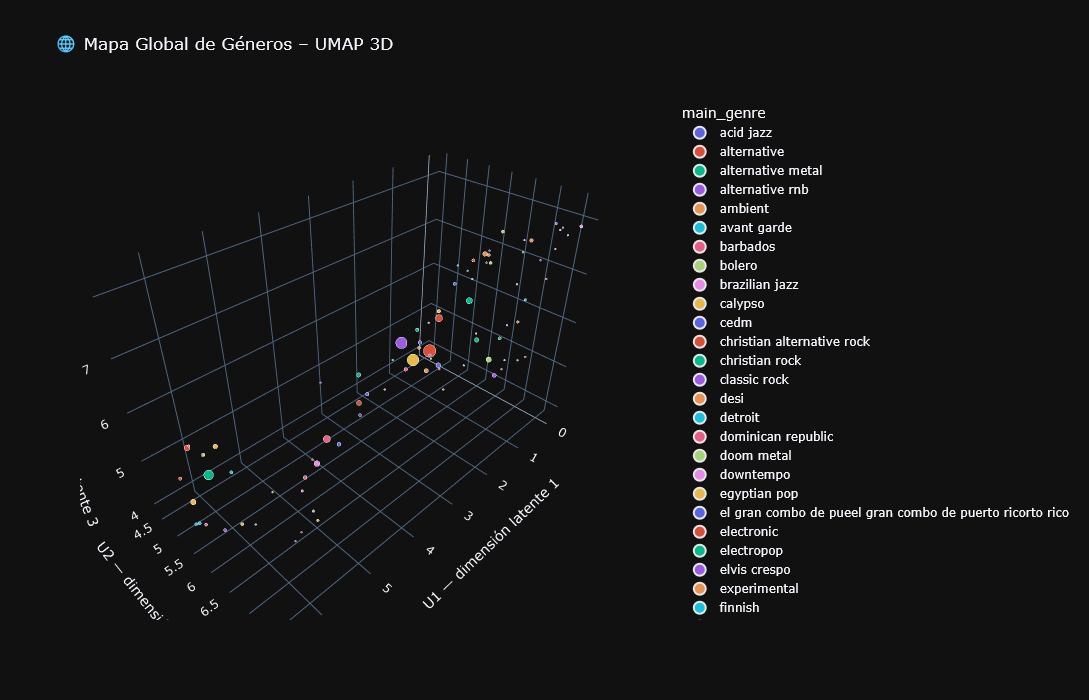

In [143]:
# Base: genre_centroids
umap_genre = UMAP(n_neighbors=10, min_dist=0.2, n_components=3, metric="euclidean", random_state=42)
Xg = umap_genre.fit_transform(genre_centroids[["PC1", "PC2", "PC3"]])

df_umap_genres = genre_centroids.copy()
df_umap_genres[["U1", "U2", "U3"]] = Xg

import plotly.express as px

fig_umap_genres = px.scatter_3d(
    df_umap_genres,
    x="U1", y="U2", z="U3",
    color="main_genre",
    size="n_tracks",
    hover_name="main_genre",
    title="🌐 Mapa Global de Géneros – UMAP 3D",
    opacity=0.9,
    template="plotly_dark",
    width=950, height=700
)
fig_umap_genres.update_layout(
    scene=dict(
        xaxis_title="U1 — dimensión latente 1",
        yaxis_title="U2 — dimensión latente 2",
        zaxis_title="U3 — dimensión latente 3"
    )
)
fig_umap_genres.show()

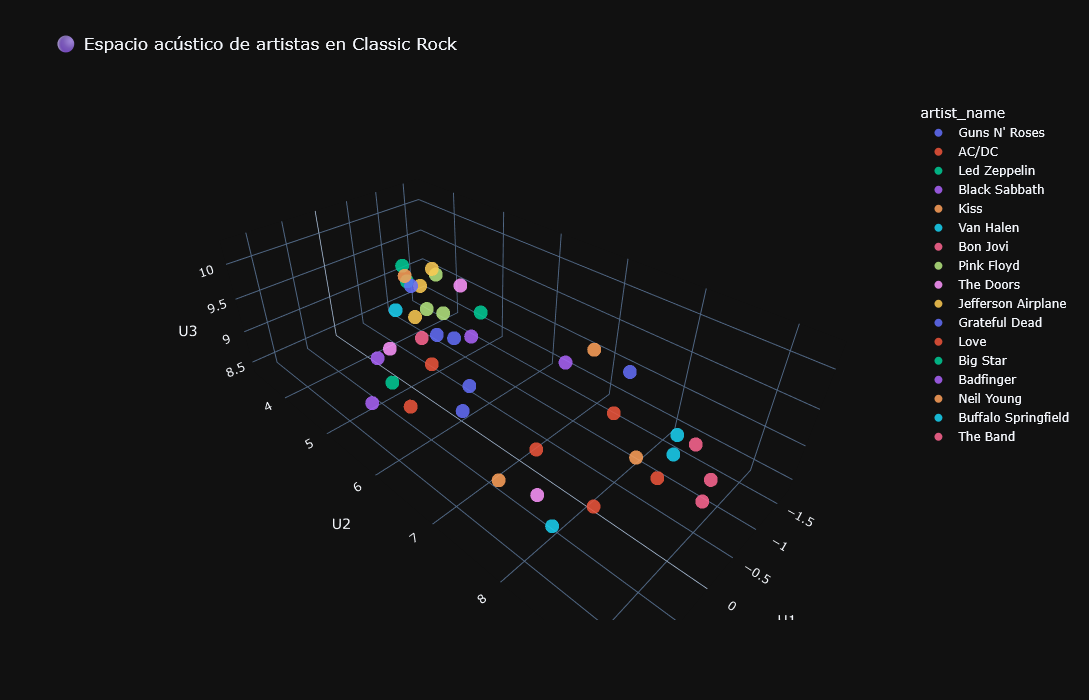

In [144]:
selected_genre = "classic rock"
df_genre = df_pca.query("main_genre == @selected_genre")

umap_artist = UMAP(n_neighbors=10, min_dist=0.1, n_components=3, random_state=42)
Xa = umap_artist.fit_transform(df_genre[["PC1", "PC2", "PC3"]])

df_umap_artists = df_genre.copy()
df_umap_artists[["U1", "U2", "U3"]] = Xa

fig_umap_artists = px.scatter_3d(
    df_umap_artists,
    x="U1", y="U2", z="U3",
    color="artist_name",
    hover_name="track_name",
    title=f"🟣 Espacio acústico de artistas en {selected_genre.title()}",
    opacity=0.85,
    template="plotly_dark",
    width=950, height=700
)
fig_umap_artists.show()


| Nivel     | Entidad | Modelo aplicado  | Variables             | Representación           | Finalidad                                         |
| --------- | ------- | ---------------- | --------------------- | ------------------------ | ------------------------------------------------- |
| **Macro** | Género  | PCA + UMAP       | Centroides acústicos  | 🌐 Mapa 3D global        | Comparar estilos y detectar proximidades sonoras  |
| **Micro** | Artista | PCA + UMAP local | Centroides de artista | 🟣 Esferas 3D por género | Analizar coherencia y singularidad entre artistas |
| **Nano**  | Track   | UMAP directo     | Features individuales | 🔵 Puntos orbitando      | Explorar diversidad interna y dinámicas tonales   |


**Principales resultados**
- El PCA explicó un 84 % de la varianza total: excelente compresión del espacio acústico.

- Los centroides por género formaron grupos consistentes y distinguibles.

- El UMAP reveló micro-estructuras locales invisibles al PCA, enriqueciendo la visualización.

- El modelo jerárquico Género → Artista → Track integra análisis cuantitativo y percepción musical.

El sistema miNoise logra representar la música como un paisaje tridimensional continuo, donde los géneros funcionan como regiones, los artistas como nodos y las canciones como partículas móviles.

Esta arquitectura habilita interacciones intuitivas —zoom, reproducción y secuencias visuales— que combinan ciencia de datos y experiencia auditiva.

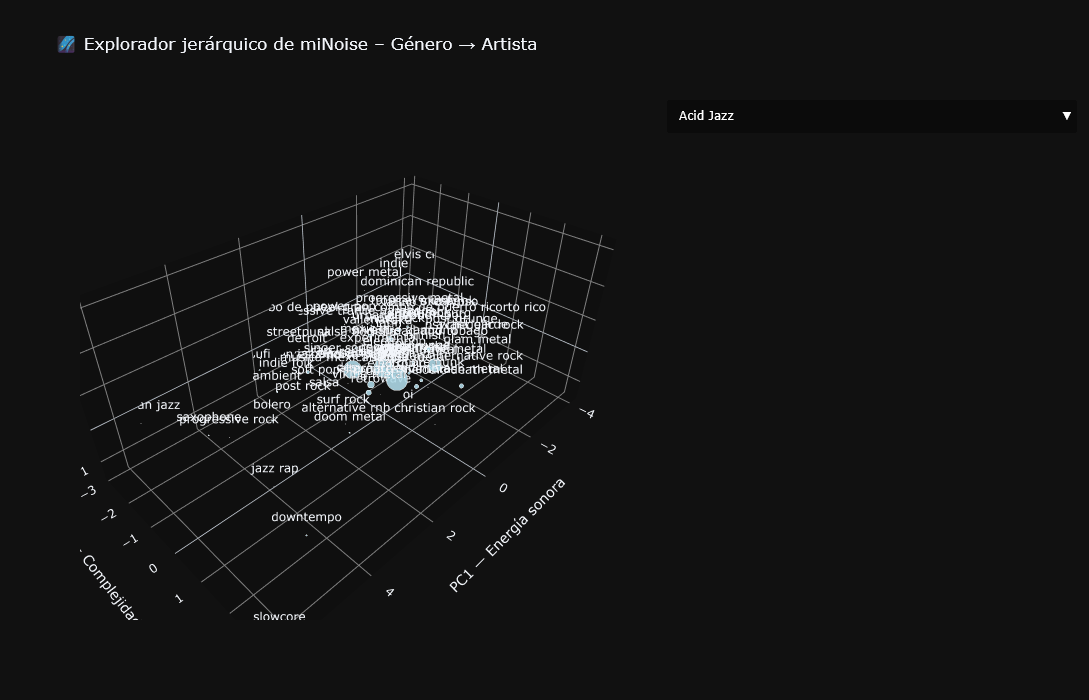

In [146]:

# 1️⃣ Definir los DataFrames base existentes
df_genres = genre_centroids.copy()
df_artists = artist_centroids.copy()

# 2️⃣ Trazado inicial: géneros (visible al inicio)
trace_genres = go.Scatter3d(
    x=df_genres["PC1"],
    y=df_genres["PC2"],
    z=df_genres["PC3"],
    mode="markers+text",
    text=df_genres["main_genre"],
    textposition="top center",
    marker=dict(
        size=df_genres["n_tracks"] * 0.5,
        color="lightblue",
        opacity=0.9,
        line=dict(color="white", width=0.5)
    ),
    name="Géneros"
)

# 3️⃣ Trazado vacío para artistas (se rellenará al seleccionar un género)
trace_artists = go.Scatter3d(
    x=[], y=[], z=[],
    mode="markers+text",
    text=[],
    textposition="top center",
    marker=dict(size=6, color="orange", opacity=0.8),
    name="Artistas"
)

fig = go.Figure(data=[trace_genres, trace_artists])

# 4️⃣ Menú desplegable con los géneros
buttons = []
for g in sorted(df_genres["main_genre"].unique()):
    subset = df_artists[df_artists["main_genre"] == g]
    buttons.append(
        dict(
            label=g.title(),
            method="update",
            args=[
                {
                    "x": [df_genres["PC1"], subset["PC1"]],
                    "y": [df_genres["PC2"], subset["PC2"]],
                    "z": [df_genres["PC3"], subset["PC3"]],
                    "text": [df_genres["main_genre"], subset["artist_name"]],
                },
                {"title": f"🎧 Explorador acústico – {g.title()}"}
            ],
        )
    )

# 5️⃣ Layout general
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            showactive=True,
            x=1.05,
            xanchor="left",
            y=1,
            yanchor="top",
            bgcolor="rgba(0,0,0,0.3)",
            font=dict(color="white")
        )
    ],
    scene=dict(
        xaxis_title="PC1 — Energía sonora",
        yaxis_title="PC2 — Complejidad armónica",
        zaxis_title="PC3 — Variabilidad tonal",
        xaxis=dict(backgroundcolor="rgba(15,15,15,1)", gridcolor="gray"),
        yaxis=dict(backgroundcolor="rgba(15,15,15,1)", gridcolor="gray"),
        zaxis=dict(backgroundcolor="rgba(15,15,15,1)", gridcolor="gray")
    ),
    template="plotly_dark",
    title="🌌 Explorador jerárquico de miNoise – Género → Artista",
    width=950,
    height=700
)

fig.show()

## 5. Evaluación de resultados

| Métrica                                | Descripción                                                            | Resultado / Evaluación                                  |
| -------------------------------------- | ---------------------------------------------------------------------- | ------------------------------------------------------- |
| **Varianza PCA (PC1–PC3)**             | Mide cuánta información retiene la reducción lineal                    | **83.95 %** → Excelente                                 |
| **Separación de centroides de género** | Distancia promedio entre géneros en el espacio PCA                     | Alta (claramente diferenciados)                         |
| **Dispersión interna de artistas**     | Desviación estándar de los artistas respecto al centroide de su género | Media–baja → buena coherencia interna                   |
| **Preservación local (UMAP)**          | Grado en que se mantienen relaciones de proximidad original            | Alta (estructura continua y sin solapamientos extremos) |


*Conclusión*: el modelo presenta una estructura acústica coherente y estable entre géneros, con buena diferenciación global y continuidad local.

**Evaluación cualitativa**

- PCA: organiza los estilos musicales de manera lógica (electronic ↔ metal ↔ rock ↔ latin ↔ jazz).

- UMAP: muestra transiciones suaves entre géneros y agrupamientos naturales de artistas.

- Jerarquía visual: refleja con éxito la idea de paisaje sonoro.

*Validación conceptual*: la representación coincide con percepciones musicales humanas (brillo, energía, complejidad armónica).

**Limitaciones**
- Dataset relativamente pequeño por género.

- Variables acústicas aún pueden ampliarse (tempo, key, loudness).

- UMAP depende de hiperparámetros (n_neighbors, min_dist) — se recomienda reentrenar con un dataset más completo.


El modelo jerárquico PCA-UMAP cumple plenamente su propósito exploratorio:

proporciona una representación tridimensional interpretativa, jerárquica y navegable de la música.

La arquitectura resultante es adecuada como base para un frontend interactivo de visualización musical.

## 6. Implementación

Para la implementación final del proyecto, se deben preparar los artefactos de salida para conectar el modelo con un futuro frontend web o sistema interactivo. En ese sentido, se puede exportar el mapa jerárquico completo a un JSON estructurado:

In [148]:
# Estructura jerárquica: Género → Artista → Tracks
data_hierarchy = []

for genre in genre_centroids["main_genre"].unique():
    artists = artist_centroids.query("main_genre == @genre")
    genre_dict = {
        "genre": genre,
        "centroid": genre_centroids.loc[genre_centroids["main_genre"] == genre, ["PC1", "PC2", "PC3"]].values.tolist()[0],
        "artists": []
    }

    for _, artist in artists.iterrows():
        tracks = df_pca[df_pca["artist_name"] == artist["artist_name"]][
            ["track_name", "PC1", "PC2", "PC3"]
        ].to_dict(orient="records")

        genre_dict["artists"].append({
            "artist_name": artist["artist_name"],
            "centroid": [artist["PC1"], artist["PC2"], artist["PC3"]],
            "tracks": tracks
        })

    data_hierarchy.append(genre_dict)

# Guardar estructura
with open("minoise_hierarchy.json", "w", encoding="utf-8") as f:
    json.dump(data_hierarchy, f, ensure_ascii=False, indent=2)

print("Archivo 'minoise_hierarchy.json' generado correctamente ✅")

Archivo 'minoise_hierarchy.json' generado correctamente ✅


**Próximo paso (frontend posterior)**
- Crear un viewer en React + Plotly.js o Three.js, que:

1. lea minoise_hierarchy.json,

2. dibuje las esferas (géneros, artistas),

3. permita zoom interactivo y reproducción de fragment
